<a href="https://colab.research.google.com/github/janbanot/msc-cs-code/blob/main/DL_2025_Lab1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zad 1

Zadanie skupia się na tematyce regresji liniowej prezentowanej w ramach pierwszego wykładu.

In [80]:
# Import potrzebnych bibliotek
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Przykładowe dane:

x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [82]:
def predict(X, w, b):
    """
    Oblicza przewidywane wartości na podstawie wagi (w) i biasu (b).

    Args:
        X (numpy.ndarray): Dane wejściowe.
        w (float): Współczynnik kierunkowy.
        b (float): Wyraz wolny.

    Returns:
        numpy.ndarray: Predykowane wartości.
    """
    return X * w + b

In [83]:
def plot(x, y, w, b):
    "Wykres danych (x, y) oraz modelu liniowego"
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    min_x = np.min(x)
    max_x = np.max(x)

    plt.xlim([min_x, max_x])
    plt.ylim([0, np.max(y)])
    ax.set_xlabel("Input, $x$")
    ax.set_ylabel("Output, $y$")
    # Prosta
    x_line = np.arange(min_x, max_x, 0.01)
    y_line = predict(x_line, w, b)
    plt.plot(x_line, y_line, "b-", lw=2)

    plt.show()

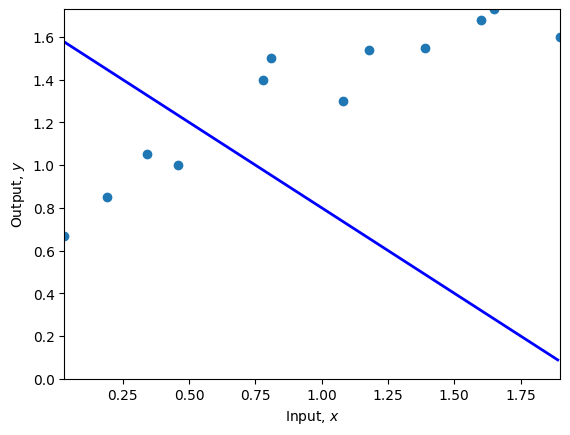

In [84]:
# Parametry
w = -0.8
b = 1.6
# Wykres danych i modelu liniowego:
plot(x, y, w, b)

In [85]:
def compute_loss(y_true, y_pred):
    """
    Oblicza sumę kwadratów błędów.

    Args:
        y_true (numpy.ndarray): Rzeczywiste wartości.
        y_pred (numpy.ndarray): Przewidywane wartości.

    Returns:
        float: Wartość funkcji straty.
    """
    return np.sum((y_true - y_pred) ** 2)

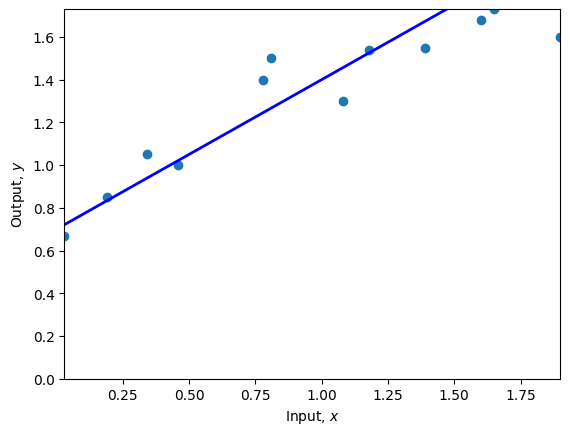

Strata: 0.3537089999999996


In [86]:
# TODO: Spróbuj ręcznie dopasować wartości modelu, tak aby uzyskać jak najniższą stratę
w = 0.7
b = 0.7
plot(x, y, w, b)
print(f"Strata: {compute_loss(y, predict(x, w, b))}")

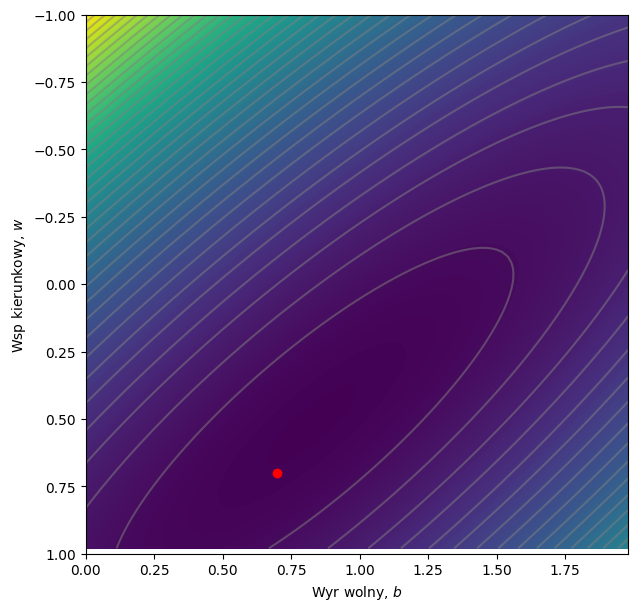

In [87]:
# Siatka (grid) 2d dla par wartości atrybutów modelu
b_mesh, w_mesh = np.meshgrid(np.arange(0.0, 2.0, 0.02), np.arange(-1.0, 1.0, 0.02))

all_losses = np.zeros_like(w_mesh)

# Wyznacz stratę dla kombinacji (bias, waga)
for row_col, bias in np.ndenumerate(b_mesh):
    weight = w_mesh[row_col]
    all_losses[row_col] = compute_loss(y, predict(x, weight, bias))

# Wykres mapy ciepła dla funkcji straty
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7, 7)
levels = 256
ax.contourf(b_mesh, w_mesh, all_losses, levels)
levels = 40
ax.contour(b_mesh, w_mesh, all_losses, levels, colors=["#80808080"])
ax.set_ylim([1, -1])
ax.set_xlabel(r"Wyr wolny, $b$")
ax.set_ylabel(r"Wsp kierunkowy, $w$")

# Parametry modelu jako czerwony pkt. -- powinien być blisko minimum
ax.plot(b, w, "ro")
plt.show()

Sprawdź jak daleko znalezione parametry znajdują się od optimum na poniższym wykresie.

# Zad 2

Uzupełnij poniższy kod, tak aby dokonał treningu naszego modelu liniowego
automatycznie za pomocą __metody gradientu prostego__.

- Proszę sprawdzić, jak zachowuje się trening dla różnych wartości **współczynnika szybkości uczenia**.

Iteracja 1: Strata = 24.765, w = -0.182, b = 0.760
Iteracja 2: Strata = 8.770, w = 0.007, b = 0.907
Iteracja 3: Strata = 3.318, w = 0.120, b = 0.989
Iteracja 4: Strata = 1.450, w = 0.190, b = 1.033
Iteracja 5: Strata = 0.803, w = 0.234, b = 1.054
Iteracja 6: Strata = 0.572, w = 0.262, b = 1.064
Iteracja 7: Strata = 0.482, w = 0.282, b = 1.065
Iteracja 8: Strata = 0.441, w = 0.297, b = 1.063
Iteracja 9: Strata = 0.418, w = 0.308, b = 1.059
Iteracja 10: Strata = 0.401, w = 0.317, b = 1.053
Iteracja 11: Strata = 0.387, w = 0.325, b = 1.046
Iteracja 12: Strata = 0.374, w = 0.333, b = 1.040
Iteracja 13: Strata = 0.363, w = 0.340, b = 1.033
Iteracja 14: Strata = 0.352, w = 0.346, b = 1.026
Iteracja 15: Strata = 0.342, w = 0.352, b = 1.020
Iteracja 16: Strata = 0.333, w = 0.358, b = 1.013
Iteracja 17: Strata = 0.324, w = 0.363, b = 1.007
Iteracja 18: Strata = 0.316, w = 0.368, b = 1.001
Iteracja 19: Strata = 0.308, w = 0.374, b = 0.995
Iteracja 20: Strata = 0.301, w = 0.379, b = 0.990

Wytren

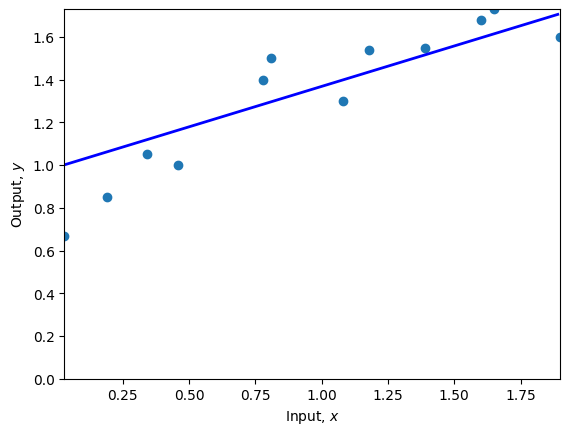

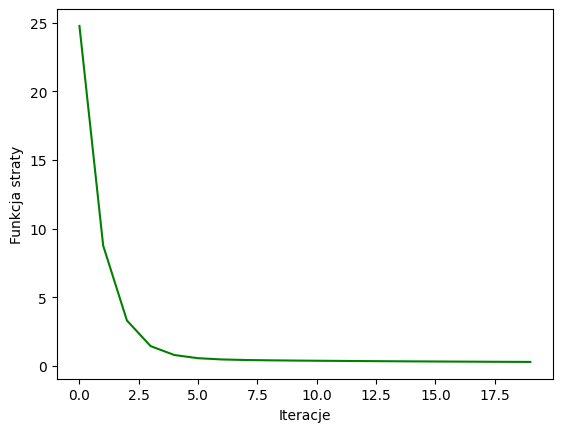

In [88]:
def gradient_descent(X, y, w_init, b_init, learning_rate, n_iterations):
    """
    Metoda gradientu prostego

    Args:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Rzeczywiste wartości.
        w_init (float): Początkowa wartość wagi.
        b_init (float): Początkowa wartość biasu.
        learning_rate (float): Szybkość nauki.
        n_iterations (int): Liczba iteracji.

    Returns:
        w (float): Wytrenowana waga.
        b (float): Wytrenowany bias.
        history (list): Historia wartości funkcji straty.
    """
    w = w_init
    b = b_init
    history = []

    m = len(X)

    for i in range(n_iterations):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        history.append(loss)

        # Obliczanie gradientów
        dw = (2 / m) * np.sum((y_pred - y) * X)
        db = (2 / m) * np.sum(y_pred - y)

        # Aktualizacja parametrów
        w = w - learning_rate * dw
        b = b - learning_rate * db

        print(f"Iteracja {i + 1}: Strata = {loss:.3f}, w = {w:.3f}, b = {b:.3f}")

    return w, b, history


# Trenowanie modelu
# Inicjalizacja parametrów
w_initial = -0.5
b_initial = 0.5

# Hiperparametry:
learning_rate = 0.1
n_iterations = 20

# Trenowanie
w_trained, b_trained, loss_history = gradient_descent(
    x, y, w_initial, b_initial, learning_rate, n_iterations
)

print(f"\nWytrenowane parametry: w = {w_trained:.3f}, b = {b_trained:.3f}")

plot(x, y, w_trained, b_trained)

# Wizualizacja historii funkcji straty
plt.plot(range(n_iterations), loss_history, color="green")
plt.xlabel("Iteracje")
plt.ylabel("Funkcja straty")
plt.show()

# Zad. 3

 Przeprowadź trening **modelu liniowego** dla poniższych (symulowanych) danych ceny domu w zależności od metrażu, tj. `(surface, price)`.

_Zwróć uwagę na wartość współczynnika uczenia._

Odpowiedz na pytania:
- Dlaczego wart. współczynnika szybkości uczenia różni się istotnie od tej w poprzednim zadaniu?
- Czy transformacja danych wejściowych pomoże?
- Jak działa `sklearn.preprocessing.StandardScaler`?

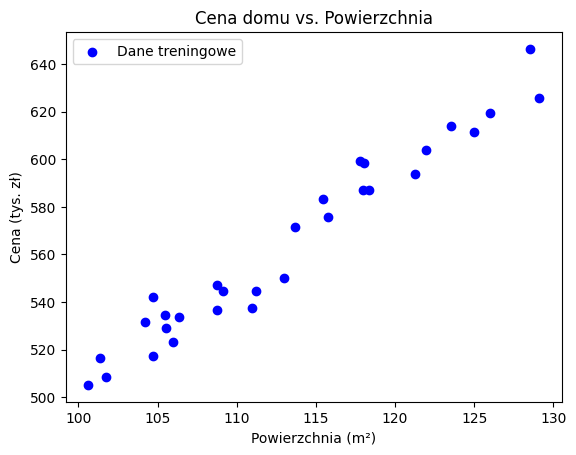

In [89]:
# Generowanie przykładowych danych
np.random.seed(42)  # Dla powtarzalności wyników

# Załóżmy, że cena domu zależy liniowo od jego powierzchni
# Cena = 50 * powierzchnia + 10 + losowy szum
houses = 30
surface = (
    100 + np.random.rand(houses, 1) * houses
)  # Powierzchnia w metrach kwadratowych (od 100 do 200)
noise = np.random.randn(houses, 1)
price = 5 * surface + 10 * noise  # Cena w tysiącach złotych

# Wizualizacja danych
plt.scatter(surface, price, color="blue", label="Dane treningowe")
plt.xlabel("Powierzchnia (m²)")
plt.ylabel("Cena (tys. zł)")
plt.title("Cena domu vs. Powierzchnia")
plt.legend()
plt.show()

Iteracja 1: Strata = 5.888, w = 0.847, b = 0.874
Iteracja 2: Strata = 2.174, w = 0.757, b = 0.803
Iteracja 3: Strata = 0.909, w = 0.703, b = 0.763
Iteracja 4: Strata = 0.476, w = 0.669, b = 0.741
Iteracja 5: Strata = 0.327, w = 0.649, b = 0.730
Iteracja 6: Strata = 0.274, w = 0.635, b = 0.725
Iteracja 7: Strata = 0.254, w = 0.626, b = 0.724
Iteracja 8: Strata = 0.245, w = 0.620, b = 0.725
Iteracja 9: Strata = 0.240, w = 0.614, b = 0.726
Iteracja 10: Strata = 0.237, w = 0.610, b = 0.729
Iteracja 11: Strata = 0.234, w = 0.607, b = 0.731
Iteracja 12: Strata = 0.232, w = 0.604, b = 0.734
Iteracja 13: Strata = 0.230, w = 0.601, b = 0.737
Iteracja 14: Strata = 0.228, w = 0.598, b = 0.740
Iteracja 15: Strata = 0.226, w = 0.595, b = 0.743
Iteracja 16: Strata = 0.224, w = 0.593, b = 0.745
Iteracja 17: Strata = 0.223, w = 0.591, b = 0.748
Iteracja 18: Strata = 0.221, w = 0.588, b = 0.751
Iteracja 19: Strata = 0.220, w = 0.586, b = 0.753
Iteracja 20: Strata = 0.219, w = 0.584, b = 0.756
Iteracja 

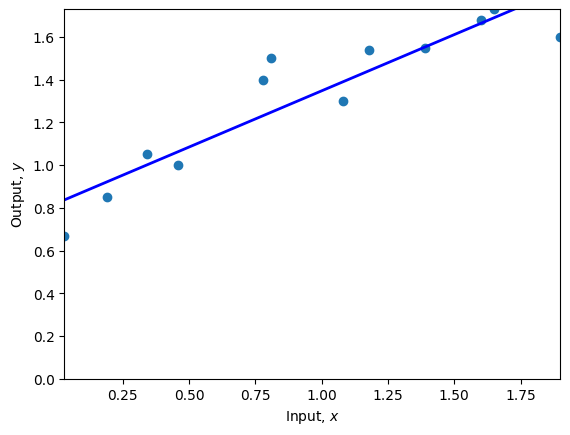

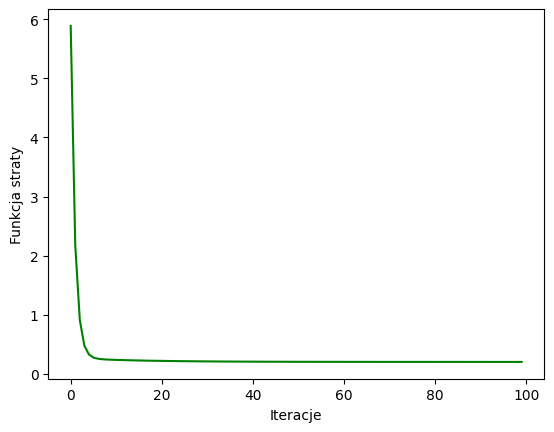

In [93]:
from sklearn.preprocessing import StandardScaler

# Tworzenie scalerów
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Normalizacja danych
# reshape(-1, 1) bo StandardScaler wymaga kształtu (n_samples, n_features)
surface_normalized = scaler_X.fit_transform(surface.reshape(-1, 1)).flatten()
price_normalized = scaler_y.fit_transform(price.reshape(-1, 1)).flatten()

surface_normalized = x
price_normalized = y

# Trenowanie modelu
# Inicjalizacja parametrów
w_initial = 1
b_initial = 1

# Hiperparametry:
learning_rate = 0.1
n_iterations = 100

# Trenowanie
w_trained, b_trained, loss_history = gradient_descent(
    x, y, w_initial, b_initial, learning_rate, n_iterations
)

print(f"\nWytrenowane parametry: w = {w_trained:.3f}, b = {b_trained:.3f}")

plot(x, y, w_trained, b_trained)

# Wizualizacja historii funkcji straty
plt.plot(range(n_iterations), loss_history, color="green")
plt.xlabel("Iteracje")
plt.ylabel("Funkcja straty")
plt.show()

# Zad 4

Uzupełnij poniższy kod, tak aby poprawnie obliczał gradient funkcji
straty dla problemu *klasyfikacji* binarnej na przykładzie zbioru Iris. Zbiór ten zawiera 3 klasy, ale traktujemy klasy versicolor oraz virginica jako jedną.

Nasz model liniowy będzie miał 3 parametry `w1`, `w2` i `b` odpowiednio dla 2 z 4 cech dostępnych w zbiorze.

## Nasze rozwiązanie

### Odczyt danych i funkcja do rys. wykresu

In [94]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# Załaduj zestaw danych Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Wybierz tylko pierwsze dwie cechy: długość płatka i szerokość płatka
X = X[:, 0:2]

# Połącz klasy 1 (versicolor) i 2 (virginica) w jedną klasę (1)
# Klasa 0 pozostaje bez zmian (setosa)
y = np.where(y == 2, 1, y)  # Wszystkie "2" zastąp "1"
X[::10], y[::10]  # Pokaż co 10-ty zestaw danych

(array([[5.1, 3.5],
        [5.4, 3.7],
        [5.4, 3.4],
        [4.8, 3.1],
        [5. , 3.5],
        [7. , 3.2],
        [5. , 2. ],
        [5.9, 3.2],
        [5.5, 2.4],
        [5.5, 2.6],
        [6.3, 3.3],
        [6.5, 3.2],
        [6.9, 3.2],
        [7.4, 2.8],
        [6.7, 3.1]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [95]:
def plot2(X, y, w1, w2, b, predictor):
    """Rysuje dwa wykresy dla podanego zbioru danych i modelu liniowego.
    predictor uruchamia model liniowy na podanych danych.
    """
    target_names = ["Setosa", "Versicolor/Virginica"]
    colors = ["red", "green"]

    # Utwórz wykres rozrzutu punktów danych
    plt.figure(figsize=(6, 5))
    for class_idx, target_name in enumerate(target_names):
        plt.scatter(
            X[y == class_idx, 0],  # Długość działki kielicha
            X[y == class_idx, 1],  # Szerokość działki kielicha
            color=colors[class_idx],
            label=target_name,
            edgecolor="k",  # Czarny brzeg dla lepszej widoczności
            s=100,  # Rozmiar punktów
            alpha=0.7,  # Przezroczystość dla nakładających się punktów
        )

    # Zdefiniuj zakres dla wykresu
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Utwórz siatkę do wykreślenia granicy decyzyjnej
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Przewiduj etykiety klas dla każdego punktu w siatce
    Z = predictor(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Wykreśl granicę decyzyjną, gdzie prawdopodobieństwo wynosi 0.5
    plt.contour(xx, yy, Z, levels=[0.5], cmap="Greys", vmin=0, vmax=1)

    # Ustaw etykiety osi i tytuł wykresu
    plt.xlabel(iris.feature_names[0].capitalize(), fontsize=12)
    plt.ylabel(iris.feature_names[1].capitalize(), fontsize=12)
    plt.title("Wykres Rozrzutu Zestawu Danych Iris z Granicą Decyzyjną", fontsize=15)
    plt.legend(title="Gatunki")
    plt.grid(True)
    plt.tight_layout()

    plt.show()

    # Wykres 3D z Powierzchnią Decyzyjną

    # Zainicjalizuj nową figurę dla wykresu 3D
    fig = plt.figure(figsize=(6, 7))
    ax = fig.add_subplot(111, projection="3d")

    # Wykreśl punkty danych w przestrzeni 3D
    for i, target_name in enumerate(target_names):
        ax.scatter(
            X[y == i, 0],  # Długość działki kielicha
            X[y == i, 1],  # Szerokość działki kielicha
            y[y == i],  # Etykieta klasy jako oś z
            color=colors[i],
            label=target_name,
            edgecolor="k",
            s=100,
            alpha=0.7,
        )

    # Utwórz siatkę dla powierzchni decyzyjnej
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # Oblicz funkcję decyzyjną (kombinacja liniowa) dla każdego punktu w siatce
    Z_plane = w1 * xx + w2 * yy + b

    # Wykreśl powierzchnię decyzyjną
    ax.plot_surface(
        xx,
        yy,
        Z_plane,
        alpha=0.3,
        color="blue",
        rstride=1,
        cstride=1,
        linewidth=0,
        antialiased=True,
    )

    ax.set_xlabel(iris.feature_names[0].capitalize(), fontsize=12)
    ax.set_ylabel(iris.feature_names[1].capitalize(), fontsize=12)
    ax.set_zlabel("Funkcja Decyzyjna", fontsize=12)
    ax.set_title("Wykres 3D z Powierzchnią Decyzyjną Modelu Liniowego", fontsize=15)

    ax.legend()
    ax.view_init(elev=20, azim=30)  # Dostosuj kąt widzenia dla lepszej wizualizacji

    plt.tight_layout()
    plt.show()

### Właściwa część

Iteracja 1: Strata = 118.603, w1 =0.151, w2 =0.189 b = 0.035
Iteracja 101: Strata = 39.195, w1 =1.186, w2 =-1.857 b = -0.248
Iteracja 201: Strata = 25.934, w1 =1.756, w2 =-2.827 b = -0.398
Iteracja 301: Strata = 20.235, w1 =2.135, w2 =-3.464 b = -0.510
Iteracja 401: Strata = 17.032, w1 =2.421, w2 =-3.941 b = -0.602
Iteracja 501: Strata = 14.960, w1 =2.652, w2 =-4.323 b = -0.682
Iteracja 601: Strata = 13.502, w1 =2.847, w2 =-4.643 b = -0.753
Iteracja 701: Strata = 12.413, w1 =3.015, w2 =-4.918 b = -0.819
Iteracja 801: Strata = 11.567, w1 =3.164, w2 =-5.160 b = -0.881
Iteracja 901: Strata = 10.887, w1 =3.297, w2 =-5.376 b = -0.939

Wytrenowane parametry: w1 = 3.417, w2 = -5.569 b = -0.994
Liczba błędów: 1


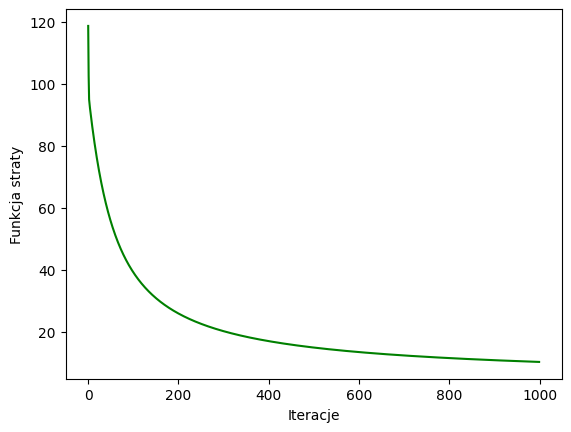

In [97]:
def predict(X, w1, w2, b):
    # Uwaga -- X jest macierzą, tj.
    # [ x1_1 x1_2 ]  <- pierwszy przykład
    # [ x2_1 x2_2 ]  <- drugi
    # ...
    # [ xn_1 xn_2 ]  <- ostatni
    # Sposób 1: Jawne mnożenie
    # return X[:, 0] * w1 + X[:, 1] * w2 + b

    # Sposób 2: Używając iloczynu skalarnego (bardziej elegancki)
    w = np.array([w1, w2])
    return X @ w + b  # @ to mnożenie macierzy


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def compute_loss(X, y_true, w1, w2, b):
    p = sigmoid(predict(X, w1, w2, b))
    # Dodanie małej wartości epsilon dla stabilności numerycznej
    epsilon = 1e-15
    p = np.clip(p, epsilon, 1 - epsilon)
    return np.sum(-y_true * np.log(p) - (1 - y_true) * np.log(1 - p))


def compute_gradient(X, y_true, w1, w2, b):
    """
    Oblicza gradient funkcji straty względem parametrów w1, w2, b.

    Zwraca: (dw1, dw2, db)
    """
    z = predict(X, w1, w2, b)
    p = sigmoid(z)

    # Różnica między predykcją a prawdziwą wartością
    error = p - y_true  # Kształt: (m,)

    # Gradienty
    dw1 = np.sum(error * X[:, 0])
    dw2 = np.sum(error * X[:, 1])
    db = np.sum(error)

    # Wersja zwięzła z mnożeniem macierzy
    # Gradient dla wag: X^T @ error
    # dw = X.T @ error  # Kształt: (2,)
    # dw1, dw2 = dw[0], dw[1]

    # Gradient dla bias
    # db = np.sum(error)

    return dw1, dw2, db


def gradient_descent(X, y, w1, w2, b, learning_rate, n_iterations):
    history = []

    for i in range(n_iterations):
        loss = compute_loss(X, y, w1, w2, b)
        history.append(loss)

        dw1, dw2, db = compute_gradient(X, y, w1, w2, b)

        # Aktualizacja parametrów
        w1 = w1 - learning_rate * dw1
        w2 = w2 - learning_rate * dw2
        b = b - learning_rate * db

        if (i % 100) == 0:
            print(
                f"Iteracja {i + 1}: Strata = {loss:.3f}, {w1 =:.3f}, {w2 =:.3f} b = {b:.3f}"
            )

    return w1, w2, b, history


w1_initial = -0.1
w2_initial = 0.1
b_initial = 0.0

# Hiperparametry:
learning_rate = 0.001
n_iterations = 1000
# Trenowanie
w1, w2, b, loss_history = gradient_descent(
    X, y, w1_initial, w2_initial, b_initial, learning_rate, n_iterations
)

print(f"\nWytrenowane parametry: {w1 = :.3f}, {w2 = :.3f} b = {b:.3f}")

pred_probs = predict(X, w1, w2, b)
pred_labels = (pred_probs > 0.5).astype(int)
num_errors = np.sum(y != pred_labels)
print(f"Liczba błędów: {num_errors}")

# Wizualizacja historii funkcji straty
plt.plot(range(n_iterations), loss_history, color="green")
plt.xlabel("Iteracje")
plt.ylabel("Funkcja straty")
plt.show()

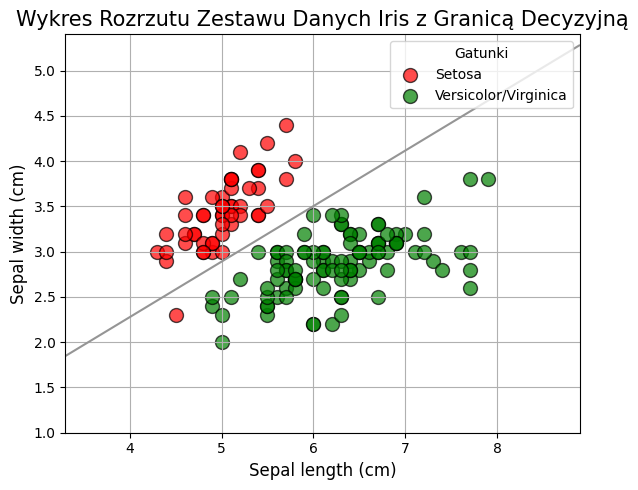

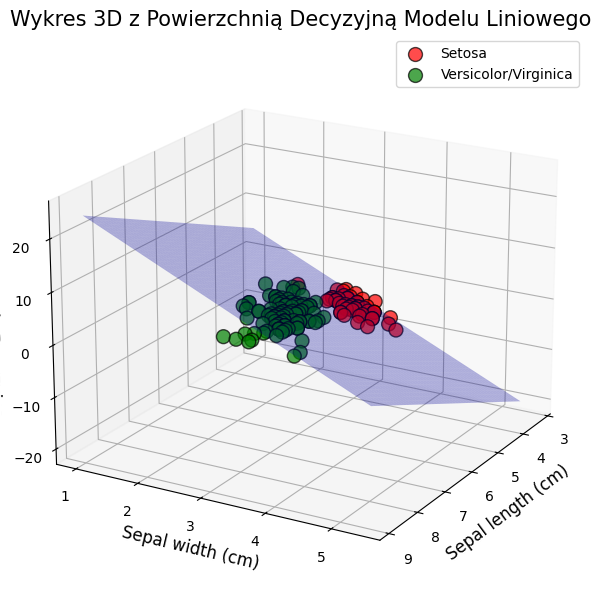

In [98]:
plot2(X, y, w1, w2, b, lambda x: sigmoid(predict(x, w1, w2, b)))

## Gradient funkcji straty

Używana funkcja straty to **Binary Cross-Entropy Loss** (binarna entropia krzyżowa), która jest powszechnie stosowana w problemach klasyfikacji binarnej, takich jak regresja logistyczna.

```python
def compute_loss(X, y_true, w1, w2, b):
    p = sigmoid(predict(X, w1, w2, b))
    return np.sum(-y_true * np.log(p) - (1 - y_true) * np.log(1 - p))
```

Gdzie:
- $ X $ to macierz cech (przykładowo, $ X = [x_1, x_2] $).
- $ y_{\text{true}} $ to wektor prawdziwych etykiet (0 lub 1).
- $ w_1, w_2 $ to wagi modelu.
- $ b $ to wyraz wolny (bias).
- $ p $ to przewidywane prawdopodobieństwa uzyskane poprzez funkcję sigmoidalną.

### **Kroki do bliczenia gradientu**

Aby zoptymalizować model, musimy obliczyć gradient funkcji straty względem parametrów $ w_1, w_2, b $. Gradient pomoże nam zrozumieć, w którą stronę należy aktualizować parametry, aby minimalizować stratę.

#### 1. **Funkcja straty:**
  
  $$
  L = -\sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
  $$
  
  gdzie:
  
  $$
  p_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}} \quad \textrm{(f. sigmoidalna)}
  $$

  oraz

  $$
  z_i = w_1 x_1^{(i)} + w_2 x_2^{(i)} + b  \quad \textrm{(akt. neuronu dla }x_i)
  $$

#### 2. **Obliczenie pochodnej f. straty względem $ p $**

Zauważmy zależności $L \rightarrow p \rightarrow z \rightarrow \{ w_1, w_2, b \} $

Najpierw obliczamy pochodną funkcji straty $ L $ względem przewidywanych prawdopodobieństw $ p_i $:

$$
\frac{\partial L}{\partial p_i} = -\left( \frac{y_i}{p_i} - \frac{1 - y_i}{1 - p_i} \right)
$$

#### 3. **Obliczenie pochodnej $ p $ względem $ z $**

Ponieważ $ p_i = \sigma(z_i) $, pochodna $ p_i $ względem $ z_i $ jest:

$$
\frac{\partial p_i}{\partial z_i} = \sigma(z_i) \cdot (1 - \sigma(z_i)) = p_i (1 - p_i)
$$

#### 4. **Zastosowanie reguły łańcuchowej**

Teraz możemy obliczyć pochodną funkcji straty względem $ z_i $:

$$
\frac{\partial L}{\partial z_i} = \frac{\partial L}{\partial p_i} \cdot \frac{\partial p_i}{\partial z_i} = -\left( \frac{y_i}{p_i} - \frac{1 - y_i}{1 - p_i} \right) \cdot p_i (1 - p_i) = p_i - y_i
$$

#### 5. **Obliczenie pochodnych cząstkowych względem $ w_1, w_2, b $**

Teraz, korzystając z pochodnej funkcji straty względem $ z_i $, możemy obliczyć pochodne cząstkowe względem $ w_1, w_2, b $:

$$
\frac{\partial L}{\partial w_j} = \sum_{i=1}^{N} \frac{\partial L}{\partial z_i} \cdot \frac{\partial z_i}{\partial w_j} = \sum_{i=1}^{N} (p_i - y_i) \cdot x_{ij}
$$

$$
\frac{\partial L}{\partial b} = \sum_{i=1}^{N} \frac{\partial L}{\partial z_i} \cdot \frac{\partial z_i}{\partial b} = \sum_{i=1}^{N} (p_i - y_i) \cdot 1 = \sum_{i=1}^{N} (p_i - y_i)
$$

Gdzie $ j = 1, 2 $, a $ x_{ij} $ to wartość cechy $ j $-tej dla przykładu $ i $-tego.

#### 6. **Finalny gradient**

$$
\frac{\partial L}{\partial w_1} = \sum_{i=1}^{N} (p_i - y_i) \cdot x_{i1}
$$

$$
\frac{\partial L}{\partial w_2} = \sum_{i=1}^{N} (p_i - y_i) \cdot x_{i2}
$$

$$
\frac{\partial L}{\partial b} = \sum_{i=1}^{N} (p_i - y_i)
$$

## Porównanie z gotową implementacją

Dla porównania użyjemy gotowej implementacji.

Współczynniki modelu: [ 3.38828053 -3.1645602 ]
Wyraz wolny modelu: -8.323154867279914


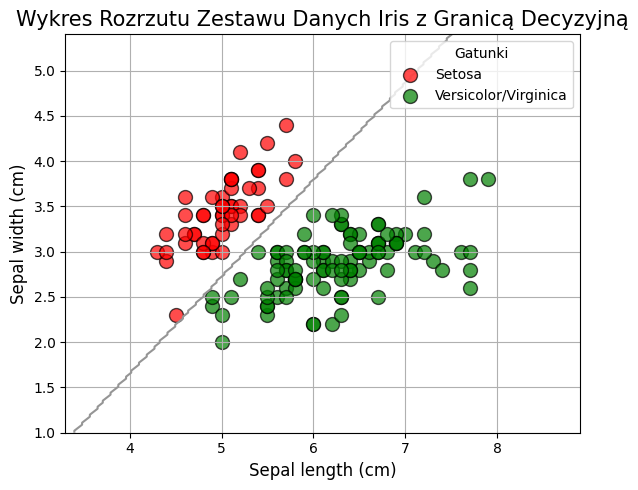

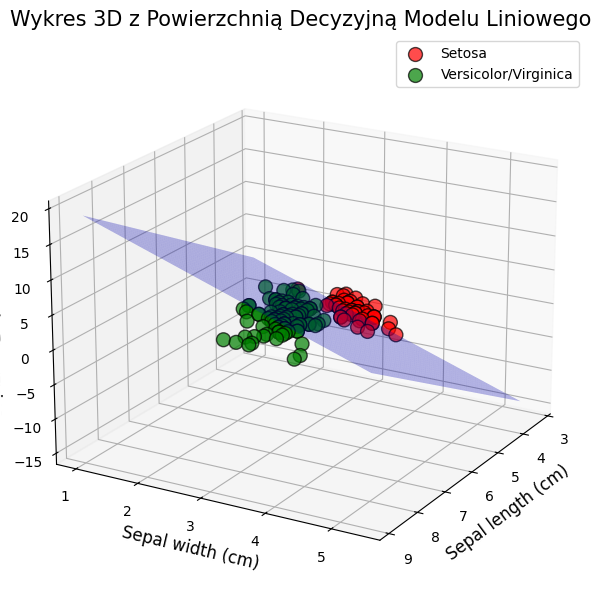

In [99]:
from sklearn.linear_model import LogisticRegression

# Inicjalizuj model regresji logistycznej
model = LogisticRegression()

# Wytrenuj model na danych
model.fit(X, y)

# Pobierz parametry modelu
coef = model.coef_[0]
intercept = model.intercept_[0]
print(f"Współczynniki modelu: {coef}")
print(f"Wyraz wolny modelu: {intercept}")

plot2(X, y, coef[0], coef[1], intercept, model.predict)

## Wersja PyTorch

PyTorch umożliwia automatyczne obliczanie gradientów, ale potrzebujemy zastąpić `ndarray` z numpy typem `tensor` oraz zmodyfikować kod obliczeń, tak aby używał odpowiedników z biblioteki PyTorch, np.
`torch.exp` zamiast `np.exp`.

In [100]:
import torch
from torch import tensor


# Załaduj zestaw danych Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Wybierz tylko pierwsze dwie cechy: długość płatka i szerokość płatka
X = tensor(X[:, 0:2])  # Uwaga, torch.tensor zamiast np.array

# Połącz klasy 1 (versicolor) i 2 (virginica) w jedną klasę (1)
# Klasa 0 pozostaje bez zmian (setosa)
y = tensor(np.where(y == 2, 1, y))

X.requires_grad = True

Iteracja 1: Strata = 118.603, w1 =0.151, w2 =0.189 b = 0.035
Iteracja 101: Strata = 39.195, w1 =1.186, w2 =-1.857 b = -0.248
Iteracja 201: Strata = 25.934, w1 =1.756, w2 =-2.827 b = -0.398
Iteracja 301: Strata = 20.235, w1 =2.135, w2 =-3.464 b = -0.510
Iteracja 401: Strata = 17.032, w1 =2.421, w2 =-3.941 b = -0.602
Iteracja 501: Strata = 14.960, w1 =2.652, w2 =-4.323 b = -0.682
Iteracja 601: Strata = 13.502, w1 =2.847, w2 =-4.643 b = -0.753
Iteracja 701: Strata = 12.413, w1 =3.015, w2 =-4.918 b = -0.819
Iteracja 801: Strata = 11.567, w1 =3.164, w2 =-5.160 b = -0.881
Iteracja 901: Strata = 10.887, w1 =3.297, w2 =-5.376 b = -0.939

Wytrenowane parametry: w1 = 3.417, w2 = -5.569 b = -0.994
Liczba błędów: 1


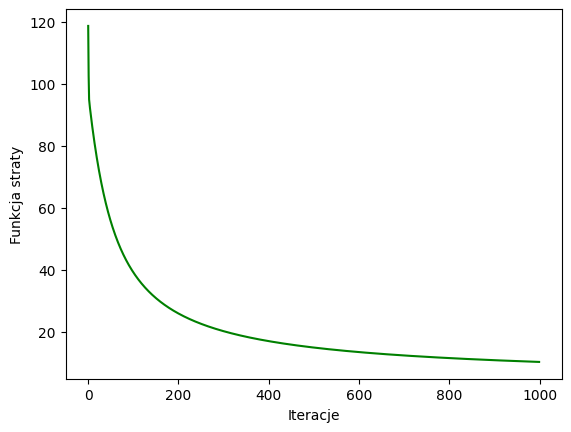

In [101]:
def predict(X, w1, w2, b):
    return w1 * X[:, 0] + w2 * X[:, 1] + b


def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


def compute_loss(X, y_true, w1, w2, b):
    p = sigmoid(predict(X, w1, w2, b))
    # Dodanie małej wartości epsilon dla stabilności numerycznej
    epsilon = 1e-15
    p = torch.clip(p, epsilon, 1 - epsilon)
    return torch.sum(-y_true * torch.log(p) - (1 - y_true) * torch.log(1 - p))


def gradient_descent(X, y, w1_init, w2_init, b_init, learning_rate, n_iterations):
    loss_history = []

    w1 = tensor(w1_init, requires_grad=True)
    w2 = tensor(w2_init, requires_grad=True)
    b = tensor(b_init, requires_grad=True)

    for i in range(n_iterations):
        loss = compute_loss(X, y, w1, w2, b)

        loss_history.append(
            loss.detach()
        )  # .detach() odłącza wartość od grafu obliczeń

        loss.backward()  # Wart. funkcji straty jest ostatnim wierzchołkiem
        # grafu obliczeń, od niego zaczyna się obliczanie
        # gradientu aż do parametrów w1, w2 oraz b

        with torch.no_grad():  # Zapobiega odłączeniu w1, w2 oraz b od grafu
            # obliczającego gradienty
            # Aktualizacja parametrów
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            b -= learning_rate * b.grad

        # Wyzerowanie gradientów
        w1.grad = None
        w2.grad = None
        b.grad = None

        if (i % 100) == 0:
            print(
                f"Iteracja {i + 1}: Strata = {loss:.3f}, {w1 =:.3f}, {w2 =:.3f} b = {b:.3f}"
            )

    return w1, w2, b, loss_history


w1_initial = -0.1
w2_initial = 0.1
b_initial = 0.0
# Hiperparametry:
learning_rate = 0.001
n_iterations = 1000
# Trenowanie
w1, w2, b, loss_history = gradient_descent(
    X, y, w1_initial, w2_initial, b_initial, learning_rate, n_iterations
)

print(f"\nWytrenowane parametry: {w1 = :.3f}, {w2 = :.3f} b = {b:.3f}")

pred_probs = predict(X, w1, w2, b)
pred_labels = (pred_probs > 0.5).numpy().astype(int)
num_errors = np.sum(y != pred_labels)
print(f"Liczba błędów: {num_errors}")

# Wizualizacja historii funkcji straty
plt.plot(range(n_iterations), loss_history, color="green")
plt.xlabel("Iteracje")
plt.ylabel("Funkcja straty")
plt.show()

### Alg. optymalizacji z PyTorch

Korzystamy z gotowej implementacji metody gradientu stochastycznego (`SGD`). Nie stosujemy porcjowania danych, dlatego wynik jest taki sam jak w przypadku metody _gradientu prostego_.


Wytrenowane parametry: w1 = 3.417, w2 = -5.569 b = -0.994
Liczba błędów: 1


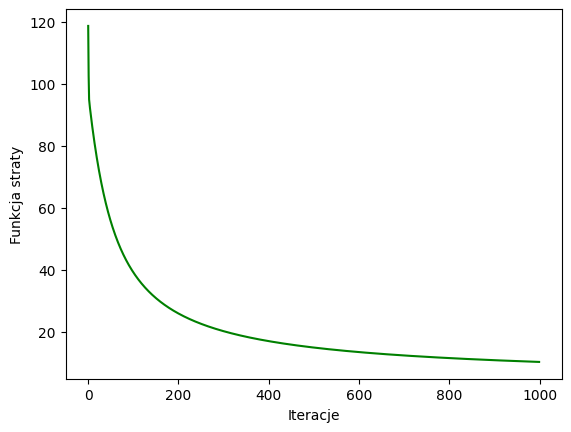

In [102]:
w1 = torch.tensor(w1_initial, requires_grad=True)
w2 = torch.tensor(w2_initial, requires_grad=True)
b = torch.tensor(b_initial, requires_grad=True)

# Dla wygody lista param. modelu
model_parameters = [w1, w2, b]

# Hiperparametry:
learning_rate = 0.001
n_iterations = 1000

optimizer = torch.optim.SGD(model_parameters, lr=0.001, momentum=0)

loss_history = []
for i in range(n_iterations):
    optimizer.zero_grad()  # Zerowanie gradientów przed kolejną iteracją

    loss = compute_loss(X, y, w1, w2, b)
    loss_history.append(loss.detach())  # .detach() odłącza wartość od grafu obliczeń

    loss.backward()  # Policz gradienty
    optimizer.step()  # Aktualizuj parametry modelu

print(f"\nWytrenowane parametry: {w1 = :.3f}, {w2 = :.3f} b = {b:.3f}")

pred_probs = predict(X, w1, w2, b)
pred_labels = (pred_probs > 0.5).numpy().astype(int)
num_errors = np.sum(y != pred_labels)
print(f"Liczba błędów: {num_errors}")

# Wizualizacja historii funkcji straty
plt.plot(range(n_iterations), loss_history, color="green")
plt.xlabel("Iteracje")
plt.ylabel("Funkcja straty")
plt.show()

# Zad 5.

Na podstawie rozwiązania zadania 4. dokonaj klasyfikacji binarnej zbioru [Yeast3](https://sci2s.ugr.es/keel/dataset.php?cod=154). Oceń jakość klasyfikacji za pomocą standardowych miar typu dokładność, miara F1 oraz macierz pomyłek. Co zauważasz?

## Pobranie danych

Poniższy kod pobiera zbiór Yeast3 i tworzy na jego podstawie ramkę `df`

In [ ]:
import os
import zipfile
import pandas as pd
import requests
from io import BytesIO

url = "https://sci2s.ugr.es/keel/dataset/data/imbalanced/yeast3.zip"
extract_path = "yeast3_data"

response = requests.get(url)  # Download the ZIP file
if response.status_code == 200:
    with zipfile.ZipFile(BytesIO(response.content), "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset downloaded and extracted successfully.")
else:
    print("Failed to download the dataset.")

dat_files = [f for f in os.listdir(extract_path) if f.endswith(".dat")]
dat_file_path = os.path.join(extract_path, dat_files[0])


def read_keel_file(filepath):
    with open(filepath, "r") as file:
        lines = file.readlines()

    # Ignore header lines starting with "@"
    data_lines = [
        line.strip() for line in lines if not line.startswith("@") and line.strip()
    ]
    attributes = [line.split()[1] for line in lines if line.startswith("@attribute")]
    df = pd.DataFrame([line.split(",") for line in data_lines], columns=attributes)
    return df


df = read_keel_file(dat_file_path)